In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# from anonymeter.evaluators import InferenceEvaluator
from anon_inference_evaluator import InferenceEvaluator2

import warnings
warnings.filterwarnings("ignore")

ori = pd.read_parquet('datasets/adults_train.parquet')
control = pd.read_csv('test_data/adults_control-test.csv')
syn = pd.read_parquet('test_data/adults_syn_ctgan.parquet')

In [11]:
columns = ori.columns
# results = []
guesses = {}

n_attacks = 25

for secret in columns:
    
    aux_cols = [col for col in columns if col != secret]
    # the attack algorithm uses the synthetic data to model the k-neighbors and then aux columns to guess secret column
    evaluator = InferenceEvaluator2(ori=ori, 
                                   syn=syn, 
                                   control=control,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks)
    evaluator.evaluate(n_jobs=-2)
    # results.append((secret, evaluator.results()))

    # after modification of InferenceEvaluator to save the Guesses
    results = {
        'y_pred': evaluator.guesses.to_list(), 
        'y_true': evaluator.targets[secret].to_list()
    }
    # guesses[secret] = pd.DataFrame(data=results)
    # note that each target is a dataframe that is sample (size of n_attacks) of the original data
    # the resultant guesses are known as y_pred, whereas the targets[secret] are y_true
    # print(type(evaluator.guesses))
    # print(type(evaluator.targets[secret]))

    results_df = pd.DataFrame(data=results)
    results_df.to_parquet('test_data/temp_anon_attack_'+secret+'.parquet')


SyntaxError: invalid syntax (4257947017.py, line 32)

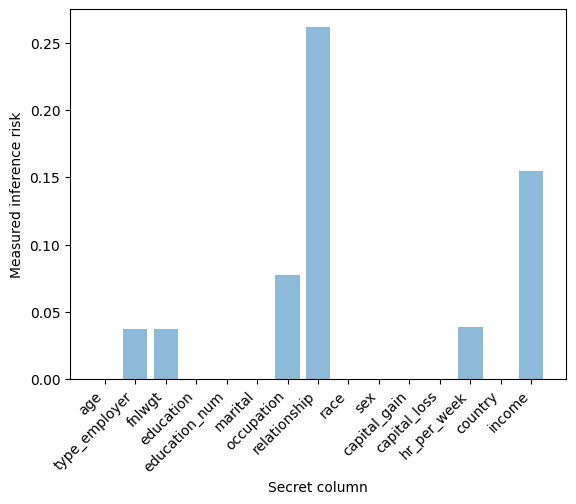

In [3]:
fig, ax = plt.subplots()

risks = [res[1].risk().value for res in results]
columns = [res[0] for res in results]

ax.bar(x=columns, height=risks, alpha=0.5, ecolor='black', capsize=10)

plt.xticks(rotation=45, ha='right')
ax.set_ylabel("Measured inference risk")
_ = ax.set_xlabel("Secret column")